<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Polynomial-Linear-Regression" data-toc-modified-id="Polynomial-Linear-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Polynomial Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Import-the-Data-Preprocessing-template-we-created-earlier." data-toc-modified-id="Import-the-Data-Preprocessing-template-we-created-earlier.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import the Data Preprocessing template we created earlier.</a></span></li><li><span><a href="#Fraud-Detection" data-toc-modified-id="Fraud-Detection-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Fraud Detection</a></span></li><li><span><a href="#Split-the-dataset-in-training-and-testing-set" data-toc-modified-id="Split-the-dataset-in-training-and-testing-set-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Split the dataset in training and testing set</a></span></li></ul></li><li><span><a href="#Fitting-Linear-Regression-Model" data-toc-modified-id="Fitting-Linear-Regression-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fitting Linear Regression Model</a></span></li><li><span><a href="#Fitting-Polynomial-Regression-to-the-dataset" data-toc-modified-id="Fitting-Polynomial-Regression-to-the-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fitting Polynomial Regression to the dataset</a></span></li><li><span><a href="#Visualising-the-Results" data-toc-modified-id="Visualising-the-Results-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualising the Results</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Polynomial-Regression" data-toc-modified-id="Polynomial-Regression-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Polynomial Regression</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-can-change-the-degree-and-make-the-model-even-better." data-toc-modified-id="We-can-change-the-degree-and-make-the-model-even-better.-4.2.0.1"><span class="toc-item-num">4.2.0.1&nbsp;&nbsp;</span>We can change the degree and make the model even better.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Predicting-a-new-Result" data-toc-modified-id="Predicting-a-new-Result-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Predicting a new Result</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression-Model" data-toc-modified-id="Linear-Regression-Model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Linear Regression Model</a></span></li><li><span><a href="#Polynomial-Regression-Model" data-toc-modified-id="Polynomial-Regression-Model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Polynomial Regression Model</a></span></li></ul></li></ul></div>

# Polynomial Linear Regression


> $y = \beta_0 + \beta_1X_1 + \beta_2X_1^2 + …. + \beta_nX_1^n$

## Import the Data Preprocessing template we created earlier.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

In [3]:
# Importing the dataset

dataset = pd.read_csv("/Users/ankitsharma/Documents/Documents/Stuff/Machine Learning/Udemy Course/Part 2 - Regression/3. Polynomial Regression/Position_Salaries.csv")

In [4]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## Fraud Detection

> A new employee came and says he's getting 160k salary. Let's predict if he's bluffing or what?

> The table is already encoded as level. So, we don't need the **Position** column

* 0th index is for Position
* 1st index - Level
* 2nd index - Salary

In [6]:
X = dataset.iloc[:, 1].values
y = dataset.iloc[:, 2].values

In [7]:
# X is identified as vector and not a matrix so we will change it to matrix by

X = dataset.iloc[:, 1:2].values #not including the column at index 2

**Note**: Always make sure that **X** is a matrix and **y** is a vector.

In [8]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [9]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

## Split the dataset in training and testing set


* Since, the dataset is too small. We don't need to make testing and training sets.

# Fitting Linear Regression Model

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Fitting Polynomial Regression to the dataset

In [14]:
poly_reg = PolynomialFeatures(degree = 2)

X_poly = poly_reg.fit_transform(X)

In [16]:
np.set_printoptions(formatter={'float_kind':'{:0.1f}'.format})

In [17]:
print(X_poly)

[[1.0 1.0 1.0]
 [1.0 2.0 4.0]
 [1.0 3.0 9.0]
 [1.0 4.0 16.0]
 [1.0 5.0 25.0]
 [1.0 6.0 36.0]
 [1.0 7.0 49.0]
 [1.0 8.0 64.0]
 [1.0 9.0 81.0]
 [1.0 10.0 100.0]]


* **What is the 1's in the column 0?**
> poly_reg() included this as a constant which we can use when we have to deal with certain libraries.

In [19]:
# To fit the poly_reg to our linear regression 

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Visualising the Results


## Linear Regression

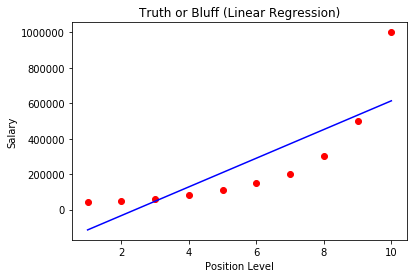

In [20]:
#Plotting the real graph
plt.scatter(X, y, color = "red")

#plotting graph based on the predictor made
plt.plot(X, lin_reg.predict(X), color = "blue")

#adding titles
plt.title("Truth or Bluff (Linear Regression)")

plt.xlabel("Position Level")
plt.ylabel("Salary")

plt.show()

The points are quite far from the prediction straight line. So, this is not a very great prediction.

## Polynomial Regression

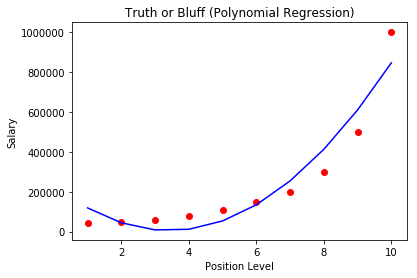

In [22]:
#Plotting the real graph
plt.scatter(X, y, color = "red")

#plotting graph based on the predictor made
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = "blue")

#adding titles
plt.title("Truth or Bluff (Polynomial Regression)")

plt.xlabel("Position Level")
plt.ylabel("Salary")

plt.show()

#### We can change the degree and make the model even better.

In [23]:
#change the degree to 3
poly_reg = PolynomialFeatures(degree = 3)

X_poly = poly_reg.fit_transform(X)

# To fit the poly_reg to our linear regression 

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

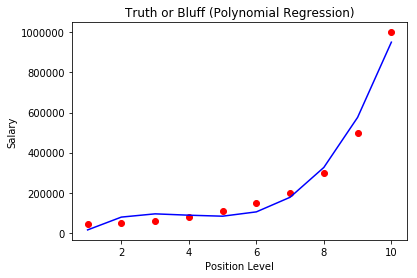

In [24]:
#Plotting the real graph
plt.scatter(X, y, color = "red")

#plotting graph based on the predictor made
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = "blue")

#adding titles
plt.title("Truth or Bluff (Polynomial Regression)")

plt.xlabel("Position Level")
plt.ylabel("Salary")

plt.show()

In [25]:
#change the degree to 4
poly_reg = PolynomialFeatures(degree = 4)

X_poly = poly_reg.fit_transform(X)

# To fit the poly_reg to our linear regression 

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

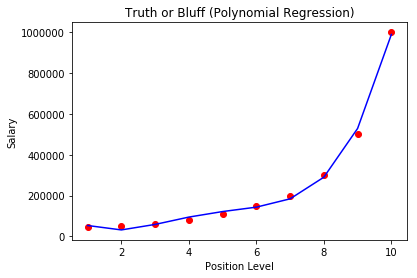

In [26]:
#Plotting the real graph
plt.scatter(X, y, color = "red")

#plotting graph based on the predictor made
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = "blue")

#adding titles
plt.title("Truth or Bluff (Polynomial Regression)")

plt.xlabel("Position Level")
plt.ylabel("Salary")

plt.show()

To make our curve look more beautiful

we can use the numpy features

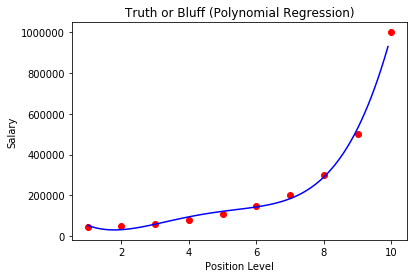

In [27]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

#Plotting the real graph
plt.scatter(X, y, color = "red")

#plotting graph based on the predictor made
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = "blue")

#adding titles
plt.title("Truth or Bluff (Polynomial Regression)")

plt.xlabel("Position Level")
plt.ylabel("Salary")

plt.show()

# Predicting a new Result

## Linear Regression Model

In [28]:
lin_reg.predict(6.5) #6.5 is the level of the prediction we want

array([330378.8])

In [29]:
lin_reg.predict(X)

array([-114454.5, -33575.8, 47303.0, 128181.8, 209060.6, 289939.4,
       370818.2, 451697.0, 532575.8, 613454.5])

## Polynomial Regression Model

In [30]:
lin_reg_2.predict(poly_reg.fit_transform(6.5))

array([158862.5])

Our employee said he had a salary of 160K and we predicted that his salary was 158K. So, he was speaking truth.
Hirable Employee found..

In [32]:
lin_reg_2.predict(poly_reg.fit_transform(6))

array([143275.1])

In [33]:
lin_reg_2.predict(poly_reg.fit_transform(X))

array([53356.6, 31759.9, 58642.2, 94632.9, 121724.9, 143275.1, 184003.5,
       289994.2, 528694.6, 988916.1])